# Football Analytics: Analysing the evolution of English Premier League
Author: Pradyumna Davuloori

## 1. Introduction ##
Football is the most popular sport in the world. It is widely reported that the final of the 2018 FIFA Men’s World Cup, the most prestigious football tournament, was watched by more than half the world’s population! 

There are many reasons for football’s popularity. It is one of the easiest sports to pick up as a kid, needing just an inexpensive ball and some friends to play with. Football combines physical fitness, technical quality, tactical intelligence and spatial awareness like no other sport does. 

I often like to think of football as chess, played out on a field instead of a board. 22 pieces (the players) are moving relative to their teammates, the ball, the opponents, and space on the field, all while following their coach’s instructions. Football is also beautiful, in that, it has the raw visceral excitement required to hold a casual viewer’s attention, while also having great tactical nuance to draw in the more analytical minds. 

I have been watching football since about 2005. In this period, the game has changed drastically. In the 2000s, the game was, just a game. It was heavily dependent on great players doing great things. The job of the manager was to keep the players motivated and devise a formation that put the best players in their best position, so that the players can do their thing and win games. Individual quality took precedence over collective coherence, especially in attack and midfield. There were exceptions to this, but it was largely true of how most teams and managers operated.

There are a few managers who are instrumental in making the game more tactical and strategic, namely Pep Guardiola, Jurgen Klopp, and Marcelo Bielsa, to name but a few. Among them, Pep Guardiola has by far had the biggest influence on tactics in the modern game. 

Following in the footsteps and philosophy of his mentor Johan Cruyff, Pep Guardiola devises a tactical system that gives clear instructions to his players on what positions to take on the field, relative to their teammates, the ball, and the opponent. This was once the remit of players, part of their job was to analyse this on the field and make microsecond decisions. The fact that players in Pep’s system know exactly what to do makes the game easier for them, allowing them to focus on creativity and on beating opponents in 1 vs 1 duels. This style of play is called positional play. Positional play has its origins in Dutch football in the 1970s, pioneered by Johan Cruyff and Rinus Michels. Pep Guardiola has brought it into the modern game.

The fundamental maxim in any football system is to allow the players to make the pitch big and wide when they have the ball by spreading all over the pitch vertically and horizontally. And to make the pitch small and compact when they are without the ball, by being compact vertically and horizontally.  Positional play puts clear rules into place to help players achieve these objectives, particularly for making the pitch big when in possession of the ball.  These are the main principles of positional play:

The football field is divided into twenty zones, as shown in the picture below.
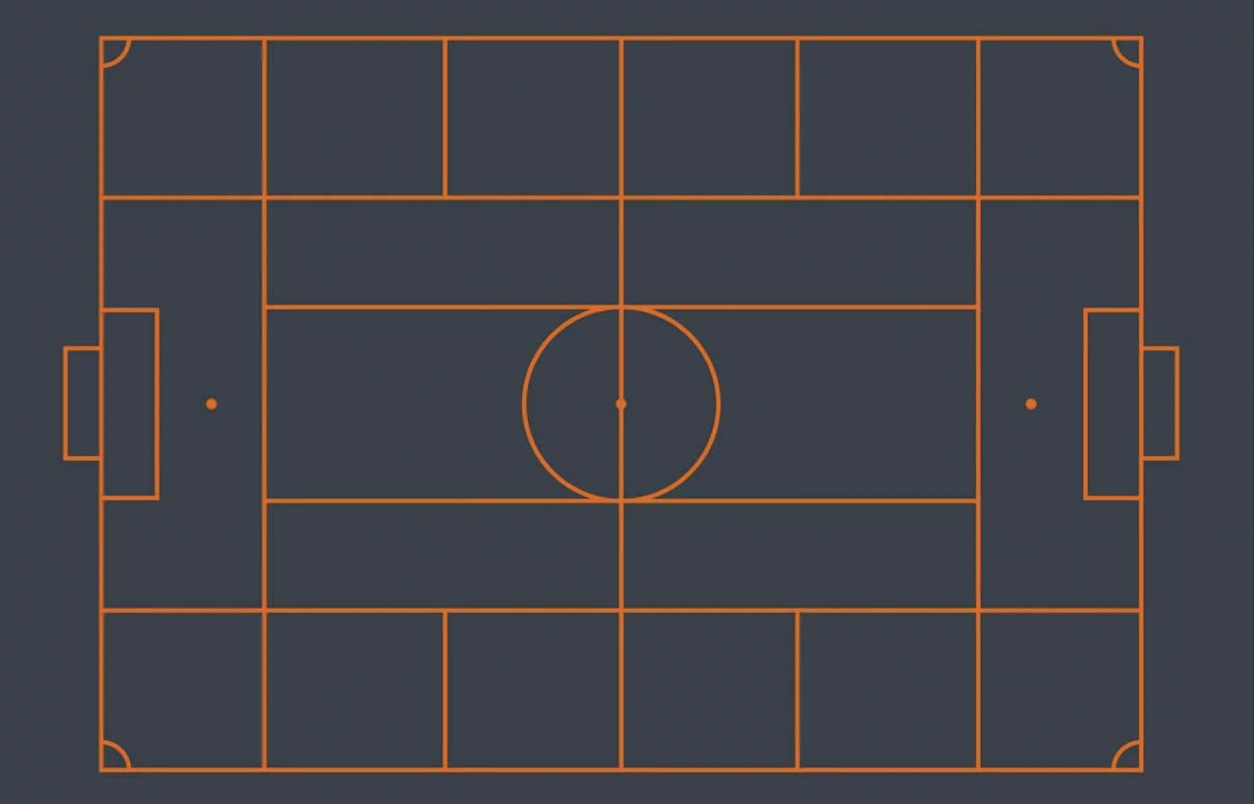

Picture Courtesy: [Coaches Voice](https://www.coachesvoice.com/)

The center is called the midfield. The sides are called the wings. The zones between the center and the midfield are called half-spaces. 

<b> There are rules given to players about occupying the zones: </b>
- No more than two players in the same horizontal zone.
- No more than three players in the same vertical zone.
- Players should move zones based on the movement of their teammates. If for example, one player leaves the right wing and it is now empty, another player occupies it. This constant movement pulls opposition players out of shape and creates space to exploit and create chances.

These rules are designed to ensure that the team always has two advantages:
- Passing options: The player on the ball always has enough passing options to pass the ball to. Positional play creates triangles all over the pitch. Triangles are great because diagonal passes are the most dangerous passes in football. Diagonal passes disrupt both the opposition’s vertical and horizontal compactness. 

- Numerical and positional superiority: Numerical superiority is when one team has more players compared to the opponent, in a certain zone of the pitch. This helps the team “overload” the opponent because, for example, 1 defender cannot defend (by legal means) against two attackers. Positional superiority is achieved when one team has more players in dangerous areas of the pitch. An example of a dangerous area is: between the opposition team’s vertical lines. In the picture below, Gundogan is between the opposition’s attacking and midfield line of players. A pass played to him bypasses three opponents and creates a dangerous situation.

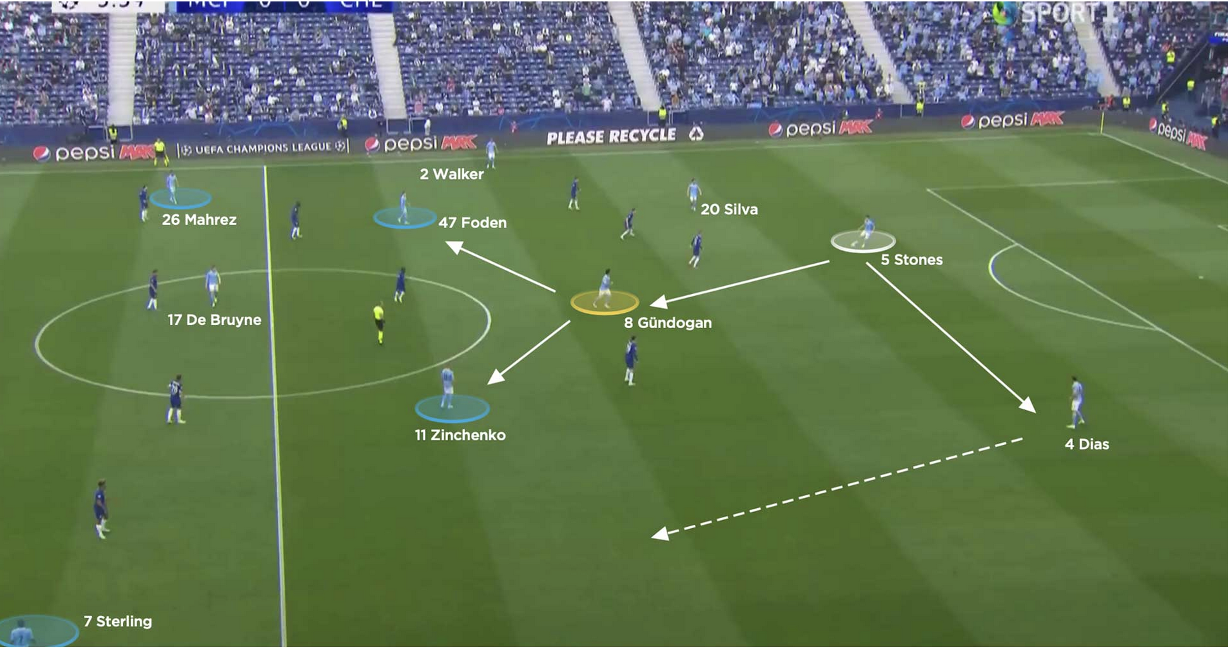
Picture Courtesy: [Coaches Voice](https://www.coachesvoice.com/)


In 2022, this is the level of precise tactical planning that goes into a lot of modern tactics in football.  The principles explained here were only for keeping the ball. Jurgen Klopp, for example, designs elaborate schemes devised to win the ball back from the opponent. A bunch of coaches have been influenced by Pep Guardiola and Jurgen Klopp and are following them in designing these complex tactical systems. 



This project will aim to produce a comprehensive report on the evolution of English football over the past few years, with a focus on the seasons between 2017-18 and 2021-2022, the last fully completed season. 

<b> The report will focus on analysing the evolution of four main facets of football: <br> </b>
i. Goalkeeping <br>
ii.	Defence <br>
iii. Passing and Possession of the ball <br>
iv.	Pressing <br>

Tactically, these are the four most meticulously planned phases of the game by most modern football managers:
- How should the goalkeeper operate in helping the team keep possession of the ball?
- How should the team defend? 
- What should the team do in possession of the ball?
- How should the team press to win the ball back? 

The evolution of these four phases will be analysed through a series of questions or hypotheses. Data analysis and visualisations will be utilised to present the answers to the questions. Through this series of questions and answers, the project aims to enlighten the reader on some of the prominent changes occurring in English Premier League football. 

The evolution of the attacking phase of the game i.e scoring goals is not being analysed in detail. Scoring goals seems important, goals win games! But the attacking phase of the game is the most laissez-faire phase and the players have a high degree of freedom. 

## 2. Data description and Initial Setup ##
### 2.1 Data description

I will be utilizing publicly available data from Fbref. Fbref is part of a family of websites operated by Sports Reference, which also provides data for Baseball, Basketball, etc. 

Fbref provides a comprehensive set of statistics about football, take a look here: [Fbref English Premier League Data](https://fbref.com/en/comps/9/Premier-League-Stats)

This project honours Fbref terms and conditions for usage of data. Check Fbref terms and conditions here: [Fbref terms and conditions](https://www.sports-reference.com/termsofuse.html)

Fbref says that the use of scrapers in a manner that may adversely damage the performance of the website are not allowed. 

Since this is a personal project aimed at analysing football through Fbref data, the terms and conditions are not being violated by any means.

### 2.2 Initial Setup
Importing the necessary Python libraries:

In [1]:
#Importing libraries:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
from selenium import webdriver  
from urllib.error import HTTPError
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from scipy import stats
import unittest

<b> Creating a simple function to assess, for the given data frame, data types of its columns and missing values in each column:

In [2]:
#creating a function to get number of missing values and data types
def assess_data_frames(df_name):
    print(f"There are {df_name.shape[0]} rows and {df_name.shape[1]} columns\n")
    assess_missing_values = len(df_name.isna().sum()[df_name.isna().sum() > 0])
    if (assess_missing_values) == 0:
        print("There are no columns with missing values")
    else:
        print(f"These columns have missing values:\n\n{df_name.isna().sum()[df_name.isna().sum() > 0]}\n\nThese are the data types of the columns:\n ")
    print(f"{df_name.dtypes}")

## 3. Analysing Changes in English football
### 3.1 Analysing the evolution of Goalkeeping
Data needs to be scraped from Fbref for goalkeeping performance of teams across a season, for the past 5 seasons.

First, get the "Regular Season" table from Fbref, as this table contains important information about each season like Ranking of each team in a season.

In [3]:
#Get the Regular Season table:
def get_standard_stats(url):
    standings_data = pd.DataFrame()
    standings_cols = ['ranking', 'squad', 'matches_played', 'matches_won', 'matches_drawn', 
                     'matches_lost', 'goals_scored', 'goals_conceded', 'goal_difference',
                     'points','points_per_match' ,'xg_for', 'xg_against','xg_difference' ,
                      'xg_difference_per90', 'last_5',
                     'attendance', 'top_scorer','goalkeeper', 'season_name', 'name']
    try:
        for season_name, season_url in urls.items():
            page = requests.get(season_url)
            standings = pd.read_html(season_url, match = "Regular season")[0]
            standings.drop('Notes', axis = 1, inplace= True)
            standings = pd.DataFrame(standings)
            standings['season_name'] = season_name
            standings['name'] = 'standings_data'
            standings_data = pd.concat([standings_data, standings], ignore_index = True)
            time.sleep(15)
    except HTTPError as error:
        print(error)
        print("The code could not be executed due to a HTTP error!")
    except ValueError:
        print("The table could not be found in the URL provided! Check the table Title")
    except requests.exceptions.ConnectionError as e:
        print("Connection could not be established! Check the URL!")
    except IndexError:
        print("There was a list index out of range error!")
    standings_data.columns = standings_cols
    return(standings_data)

urls = {'2022-2023': 'https://fbref.com/en/comps/9/Premier-League-Stats', 
       '2021-2022': 'https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats',
       '2020-2021': 'https://fbref.com/en/comps/9/2020-2021/2020-2021-Premier-League-Stats',
       '2019-2020': 'https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League-Stats',
       '2018-2019':  'https://fbref.com/en/comps/9/2018-2019/2018-2019-Premier-League-Stats',
       '2017-2018': 'https://fbref.com/en/comps/9/2017-2018/2017-2018-Premier-League-Stats'}
standings_data = get_standard_stats(urls)

<b> Running unit tests to check if the scraping processes worked as expected. These are the four test cases being verified: </b>
- Whether the function created to scrape the data exists.
- Whether the final data frame, returned by the function, exists.
- Whether the data frame contains at least 100 rows in it, a sign that the scraping has not failed completely.
- Whether the data frame contains at least 10 columns in it, another sign that the scraping has not failed completely.

In [4]:
class TestScraping(unittest.TestCase):

# Test whether the function exists:
    def test_fun_exists(self):
        self.assertIsNotNone(get_standard_stats)
        print("The function exists!")

# Test whether the data frame is not None, so something has been returned
    def test_data_frame_exists(self):
        self.assertIsNotNone(standings_data)
        print("The data frame exists!")

# Test whether the data frame has the correct number of rows:
    def test_data_frame_rows_length(self):
        self.assertGreaterEqual(len(standings_data), 100)
        print("The data frame has some data, the scraping is successful!")

# Test whether the data frame has the correct number of columns:
    def test_data_frame_columns_length(self):
        self.assertGreaterEqual(len(standings_data.columns), 10)
        print("The data frame has some columns, the scraping is successful!")
unittest.main(argv = ['ignored', '-v'], exit = False)

test_data_frame_columns_length (__main__.TestScraping) ... ok
test_data_frame_exists (__main__.TestScraping) ... ok
test_data_frame_rows_length (__main__.TestScraping) ... ok
test_fun_exists (__main__.TestScraping) ... 

The data frame has some columns, the scraping is successful!
The data frame exists!
The data frame has some data, the scraping is successful!
The function exists!


ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


The unit tests were successful. Taking a look at the data:

In [5]:
standings_data.head(8)

,ranking,squad,matches_played,matches_won,matches_drawn,matches_lost,goals_scored,goals_conceded,goal_difference,points,...,xg_for,xg_against,xg_difference,xg_difference_per90,last_5,attendance,top_scorer,goalkeeper,season_name,name
0,1,Arsenal,23,17,3,3,51,23,28,54,...,44.4,22.8,21.6,0.94,W L D L W,60192,Bukayo Saka - 9,Aaron Ramsdale,2022-2023,standings_data
1,2,Manchester City,24,16,4,4,60,24,36,52,...,50.5,19.9,30.6,1.27,W L W W D,53202,Erling Haaland - 26,Ederson,2022-2023,standings_data
2,3,Manchester Utd,24,15,4,5,41,28,13,49,...,38.9,28.6,10.3,0.43,L W D W W,73775,Marcus Rashford - 14,David de Gea,2022-2023,standings_data
3,4,Tottenham,24,13,3,8,44,35,9,42,...,34.7,28.8,5.9,0.24,L W W L W,61673,Harry Kane - 17,Hugo Lloris,2022-2023,standings_data
4,5,Newcastle Utd,23,10,11,2,35,15,20,41,...,37.1,22.6,14.6,0.63,W D D D L,52241,Miguel Almirón - 10,Nick Pope,2022-2023,standings_data
5,6,Fulham,24,11,5,8,35,30,5,38,...,30.9,39.6,-8.6,-0.36,L L D W W,23351,Aleksandar Mitrović - 11,Bernd Leno,2022-2023,standings_data
6,7,Brighton,22,10,5,7,39,29,10,35,...,36.0,26.5,9.5,0.43,W D W D L,31499,Leandro Trossard - 7,Robert Sánchez,2022-2023,standings_data
7,8,Liverpool,22,10,5,7,38,28,10,35,...,39.9,31.5,8.4,0.38,L D L W W,53209,Mohamed Salah - 8,Alisson,2022-2023,standings_data


<b> Checking data types of columns, and number of missing values:

In [6]:
assess_data_frames(standings_data)

There are 120 rows and 21 columns

These columns have missing values:

last_5    100
dtype: int64

These are the data types of the columns:
 
ranking                  int64
squad                   object
matches_played           int64
matches_won              int64
matches_drawn            int64
matches_lost             int64
goals_scored             int64
goals_conceded           int64
goal_difference          int64
points                   int64
points_per_match       float64
xg_for                 float64
xg_against             float64
xg_difference          float64
xg_difference_per90    float64
last_5                  object
attendance               int64
top_scorer              object
goalkeeper              object
season_name             object
name                    object
dtype: object


The last_5 column has missing values for the past 5 completed seasons. This column shows results of each team's previous 5 matches. This column can be dropped, it will not be utilised in the analysis.

In [7]:
# standings_data: drop the last_5 column
standings_data.drop('last_5', axis = 1, inplace = True)

<b> The “standings_data” table contains the rankings of each team for that season.
So the rankings for each team, in each season, can be extracted from the “standings_data” table and added to the other tables. The merge method from pandas is used for this.
    
Creating a function that will take a data frame as input, and add the ranking column from the standard_stats data frame to the desired data frame:

In [8]:
def merge_data_add_ranking(to_data_frame):
    #to_data_frame = pd.DataFrame(to_data_frame)
    to_data_frame = pd.merge(to_data_frame, standings_data.loc[:, ['ranking', 'squad', 'season_name']], on = ['squad', 'season_name'])
    to_data_frame.sort_values(by = ['season_name', 'ranking'], ascending = [False, True ], inplace = True)
    return(to_data_frame)

<b> Now, scraping the first data frame for goalkeepers. This table in Fbref contains basic stats about goalkeeping performance for each team in a season:

In [9]:
#Get the Squad Goalkeeping
def get_goalkeeping_table(url):
    goalkeeping_cols = ['squad', 'players_used', 'matches_played', 'starts_by_player', 
                             'total_minutes', '90s_played', 'goals_conceded', 'goals_conceded_per90',
                             'shots_on_target_faced', 'saves', 'saves_percent', 'matches_won', 'matches_drawn',
                             'matches_lost', 'clean_sheets', 'clean_sheets_percent', 'penalties_conceded',
                             'penalties_scored_against', 'penalties_saved', 'penalties_missed', 'save_percentage_pens',
                       'season_name', 'name']
    goalkeeping_stats_data = pd.DataFrame()
    try:
        for season_name, season_url in urls.items():
            page = requests.get(season_url)
            goalkeeping_stats = pd.read_html(season_url, match = "Squad Goalkeeping")[0]
            goalkeeping_stats = pd.DataFrame(goalkeeping_stats)
            goalkeeping_stats.columns = goalkeeping_stats.columns.droplevel()
            #goalkeeping_stats.columns = goalkeeping_cols
            goalkeeping_stats['season_name'] = season_name
            #goalkeeping_stats['name'] = 'goalkeeping_stats_data'
            goalkeeping_stats_data = pd.concat([goalkeeping_stats_data, goalkeeping_stats], ignore_index = True)
            time.sleep(15)
    except HTTPError as error:
        print(error)
        print("The code could not be executed due to a HTTP error!")
    except ValueError:
        print("The table could not be found in the URL provided! Check the table Title")
    except requests.exceptions.ConnectionError as e:
        print("Connection could not be established! Check the URL!")
    except IndexError:
        print("There was a list index out of range error!")
    goalkeeping_stats_data.columns = goalkeeping_cols
    return(goalkeeping_stats_data)

goalkeeping_data = get_goalkeeping_table(urls)

<b> Running unit tests:

In [10]:
class TestScraping(unittest.TestCase):

# Test whether the function exists:
    def test_fun_exists(self):
        self.assertIsNotNone(goalkeeping_data)
        print("The function exists!")

# Test whether the data frame is not None, so something has been returned
    def test_data_frame_exists(self):
        self.assertIsNotNone(goalkeeping_data)
        print("The data frame exists!")

# Test whether the data frame has the correct number of rows:
    def test_data_frame_rows_length(self):
        self.assertGreaterEqual(len(goalkeeping_data), 100)
        print("The data frame has some data, the scraping is successful!")

# Test whether the data frame has the correct number of columns:
    def test_data_frame_columns_length(self):
        self.assertGreaterEqual(len(goalkeeping_data.columns), 10)
        print("The data frame has some columns, the scraping is successful!")
unittest.main(argv = ['ignored', '-v'], exit = False)

test_data_frame_columns_length (__main__.TestScraping) ... ok
test_data_frame_exists (__main__.TestScraping) ... ok
test_data_frame_rows_length (__main__.TestScraping) ... ok
test_fun_exists (__main__.TestScraping) ... 

The data frame has some columns, the scraping is successful!
The data frame exists!
The data frame has some data, the scraping is successful!
The function exists!


ok

----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK


The unit tests were successful. Taking a look at the data:

In [11]:
goalkeeping_data.head()

,squad,players_used,matches_played,starts_by_player,total_minutes,90s_played,goals_conceded,goals_conceded_per90,shots_on_target_faced,saves,...,matches_lost,clean_sheets,clean_sheets_percent,penalties_conceded,penalties_scored_against,penalties_saved,penalties_missed,save_percentage_pens,season_name,name
0,Arsenal,1,23,23,2070,23.0,23,1.00,74,52,...,3,9,39.1,3,2,0,1,0.0,2022-2023,goalkeeping_stats_data
1,Aston Villa,2,23,23,2070,23.0,38,1.65,100,65,...,11,5,21.7,4,3,1,0,25.0,2022-2023,goalkeeping_stats_data
2,Bournemouth,2,23,23,2070,23.0,44,1.91,117,75,...,12,5,21.7,6,6,0,0,0.0,2022-2023,goalkeeping_stats_data
3,Brentford,1,23,23,2070,23.0,30,1.30,128,100,...,4,8,34.8,1,1,0,0,0.0,2022-2023,goalkeeping_stats_data
4,Brighton,1,22,22,1980,22.0,29,1.32,72,45,...,7,6,27.3,6,5,1,0,16.7,2022-2023,goalkeeping_stats_data


<b> Checking data types of columns, and number of missing values:

In [12]:
assess_data_frames(goalkeeping_data)

There are 120 rows and 23 columns

These columns have missing values:

save_percentage_pens    4
dtype: int64

These are the data types of the columns:
 
squad                        object
players_used                  int64
matches_played                int64
starts_by_player              int64
total_minutes                 int64
90s_played                  float64
goals_conceded                int64
goals_conceded_per90        float64
shots_on_target_faced         int64
saves                         int64
saves_percent               float64
matches_won                   int64
matches_drawn                 int64
matches_lost                  int64
clean_sheets                  int64
clean_sheets_percent        float64
penalties_conceded            int64
penalties_scored_against      int64
penalties_saved               int64
penalties_missed              int64
save_percentage_pens        float64
season_name                  object
name                         object
dtype: object


The data types for columns are perfect. But the save percentage for penalties column has 4 missing values, let's analyse these:

In [13]:
goalkeeping_data.loc[goalkeeping_data['save_percentage_pens'].isnull()][['squad', 'season_name','penalties_saved', 'save_percentage_pens']]

,squad,season_name,penalties_saved,save_percentage_pens
5,Chelsea,2022-2023,0,NaN
30,Liverpool,2021-2022,0,NaN
66,Crystal Palace,2019-2020,0,NaN
91,Liverpool,2018-2019,0,NaN


The missing values are for teams whose goalkeepers failed to make a single save from penalties in a season. The save percentages for these rows can be imputed with zero.

In [14]:
goalkeeping_data['save_percentage_pens'] = goalkeeping_data['save_percentage_pens'].fillna(0)

There are no missing values now:

In [15]:
assess_data_frames(goalkeeping_data)

There are 120 rows and 23 columns

There are no columns with missing values
squad                        object
players_used                  int64
matches_played                int64
starts_by_player              int64
total_minutes                 int64
90s_played                  float64
goals_conceded                int64
goals_conceded_per90        float64
shots_on_target_faced         int64
saves                         int64
saves_percent               float64
matches_won                   int64
matches_drawn                 int64
matches_lost                  int64
clean_sheets                  int64
clean_sheets_percent        float64
penalties_conceded            int64
penalties_scored_against      int64
penalties_saved               int64
penalties_missed              int64
save_percentage_pens        float64
season_name                  object
name                         object
dtype: object


<b> Now, scraping the advanced goalkeeping stats data from Fbref:

In [16]:
def get_adv_goalkeeping_table(url):
    advanced_goalkeeping_cols = ['squad', 'players_used', '90s_played', 'goals_conceded', 'penalties_concded',
                       'free_kicks_conceded', 'corners_conceded', 'own_goals_conceded', 'post_shot_xg',
                       'post_shot_xg_per_shot_on_target', 'post_shot_xg_minus_goals_conceded',
                         'post_shot_xg_minus_goals_conceded_per90',
                       'launched_passes_completed', 'launched_passes_attempted', 'launched_passes_completed_percent',
                       'passes_attempted', 'throws_attempted', 'passes_launched_percent', 'pass_avg_length',
                       'goal_kicks_attempted', 'goal_kicks_launched_percent', 'goal_kicks_avg_length', 
                       'crosses_attempted_against', 'crosses_stopped_by', 'crosses_stop_percent', 
                       'defensive_actions_outside_area', 'defensive_actions_outside_area_per90',
                       'avg_dist_of_defensive_actions', 'season_name', 'name']
    advanced_goalkeeping_data = pd.DataFrame()
    try:
        for season_name, season_url in urls.items():
            page = requests.get(season_url)
            advanced_goalkeeping_stats = pd.read_html(season_url, match = "Squad Advanced Goalkeeping")[0]
            advanced_goalkeeping_stats = pd.DataFrame(advanced_goalkeeping_stats)
            advanced_goalkeeping_stats.columns = advanced_goalkeeping_stats.columns.droplevel()
            advanced_goalkeeping_stats['season_name'] = season_name
            #advanced_goalkeeping_stats['name'] = 'advanced_goalkeeping_data'
            advanced_goalkeeping_data = pd.concat([advanced_goalkeeping_data, advanced_goalkeeping_stats],
                                                  ignore_index = True)
            time.sleep(15)
    except HTTPError as error:
        print(error)
        print("The code could not be executed due to a HTTP error!")
    except ValueError:
        print("The table could not be found in the URL provided! Check the table Title")
    except requests.exceptions.ConnectionError as e:
        print("Connection could not be established! Check the URL!")
    except IndexError:
        print("There was a list index out of range error!")
    advanced_goalkeeping_data.columns = advanced_goalkeeping_cols       
    return(advanced_goalkeeping_data)

advanced_goalkeeping_data = get_adv_goalkeeping_table(urls)

In [17]:
class TestScraping(unittest.TestCase):

# Test whether the function exists:
    def test_fun_exists(self):
        self.assertIsNotNone(advanced_goalkeeping_data)
        print("The function exists!")

# Test whether the data frame is not None, so something has been returned
    def test_data_frame_exists(self):
        self.assertIsNotNone(advanced_goalkeeping_data)
        print("The data frame exists!")

# Test whether the data frame has the correct number of rows:
    def test_data_frame_rows_length(self):
        self.assertGreaterEqual(len(advanced_goalkeeping_data), 100)
        print("The data frame has some data, the scraping is successful!")

# Test whether the data frame has the correct number of columns:
    def test_data_frame_columns_length(self):
        self.assertGreaterEqual(len(advanced_goalkeeping_data.columns), 10)
        print("The data frame has some columns, the scraping is successful!")
unittest.main(argv = ['ignored', '-v'], exit = False)

test_data_frame_columns_length (__main__.TestScraping) ... ok
test_data_frame_exists (__main__.TestScraping) ... ok
test_data_frame_rows_length (__main__.TestScraping) ... ok
test_fun_exists (__main__.TestScraping) ... 

The data frame has some columns, the scraping is successful!
The data frame exists!
The data frame has some data, the scraping is successful!
The function exists!


ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


The unit tests were successful. Taking a look at the data:

In [18]:
advanced_goalkeeping_data.head(5)

,squad,players_used,90s_played,goals_conceded,penalties_concded,free_kicks_conceded,corners_conceded,own_goals_conceded,post_shot_xg,post_shot_xg_per_shot_on_target,...,goal_kicks_launched_percent,goal_kicks_avg_length,crosses_attempted_against,crosses_stopped_by,crosses_stop_percent,defensive_actions_outside_area,defensive_actions_outside_area_per90,avg_dist_of_defensive_actions,season_name,name
0,Arsenal,1,23.0,23,2,0,3,1,21.4,0.27,...,62.8,51.2,249,16,6.4,25,1.09,15.4,2022-2023,advanced_goalkeeping_data
1,Aston Villa,2,23.0,38,3,1,8,4,30.4,0.27,...,51.6,42.7,298,42,14.1,27,1.17,14.4,2022-2023,advanced_goalkeeping_data
2,Bournemouth,2,23.0,44,6,0,11,2,39.5,0.29,...,64.9,46.1,476,26,5.5,18,0.78,10.9,2022-2023,advanced_goalkeeping_data
3,Brentford,1,23.0,30,1,0,7,2,30.5,0.24,...,72.3,52.7,368,37,10.1,35,1.52,15.8,2022-2023,advanced_goalkeeping_data
4,Brighton,1,22.0,29,5,0,4,3,24.1,0.26,...,38.6,35.9,220,17,7.7,13,0.59,12.5,2022-2023,advanced_goalkeeping_data


Checking data types and missing values:

In [19]:
assess_data_frames(advanced_goalkeeping_data)

There are 120 rows and 30 columns

There are no columns with missing values
squad                                       object
players_used                                 int64
90s_played                                 float64
goals_conceded                               int64
penalties_concded                            int64
free_kicks_conceded                          int64
corners_conceded                             int64
own_goals_conceded                           int64
post_shot_xg                               float64
post_shot_xg_per_shot_on_target            float64
post_shot_xg_minus_goals_conceded          float64
post_shot_xg_minus_goals_conceded_per90    float64
launched_passes_completed                    int64
launched_passes_attempted                    int64
launched_passes_completed_percent          float64
passes_attempted                             int64
throws_attempted                             int64
passes_launched_percent                    float64
pass_a

There are no missing values. The data types of all columns are appropriate.

<b> Now, the two tables related to keeping can be merged:
First, some columns that will be not be used in the analysis are dropped. Then the merging is done:

In [20]:
#Merging the goalkeeping and advanced goalkeeping tables
goalkeeping_data.drop(['players_used', 'matches_played', 'starts_by_player', 'total_minutes', '90s_played',
                       'penalties_conceded', 'penalties_scored_against', 'penalties_saved', 'penalties_missed', 
                       'save_percentage_pens','matches_won', 'matches_lost', 'matches_drawn'], 
                    axis = 1, inplace = True)
advanced_goalkeeping_data.drop(['players_used','90s_played', 'goals_conceded'], axis = 1, inplace = True)

goalkeeping_merged_data = pd.merge(goalkeeping_data, advanced_goalkeeping_data, on = ['squad', 'season_name'])
goalkeeping_merged_data.head(5)

,squad,goals_conceded,goals_conceded_per90,shots_on_target_faced,saves,saves_percent,clean_sheets,clean_sheets_percent,season_name,name_x,...,goal_kicks_attempted,goal_kicks_launched_percent,goal_kicks_avg_length,crosses_attempted_against,crosses_stopped_by,crosses_stop_percent,defensive_actions_outside_area,defensive_actions_outside_area_per90,avg_dist_of_defensive_actions,name_y
0,Arsenal,23,1.00,74,52,71.6,9,39.1,2022-2023,goalkeeping_stats_data,...,86,62.8,51.2,249,16,6.4,25,1.09,15.4,advanced_goalkeeping_data
1,Aston Villa,38,1.65,100,65,65.0,5,21.7,2022-2023,goalkeeping_stats_data,...,155,51.6,42.7,298,42,14.1,27,1.17,14.4,advanced_goalkeeping_data
2,Bournemouth,44,1.91,117,75,67.5,5,21.7,2022-2023,goalkeeping_stats_data,...,211,64.9,46.1,476,26,5.5,18,0.78,10.9,advanced_goalkeeping_data
3,Brentford,30,1.30,128,100,77.3,8,34.8,2022-2023,goalkeeping_stats_data,...,173,72.3,52.7,368,37,10.1,35,1.52,15.8,advanced_goalkeeping_data
4,Brighton,29,1.32,72,45,66.7,6,27.3,2022-2023,goalkeeping_stats_data,...,127,38.6,35.9,220,17,7.7,13,0.59,12.5,advanced_goalkeeping_data


<b> Now, let's add the ranking column to the data frame. The function created previously is utilised:

In [21]:
goalkeeping_merged_data = merge_data_add_ranking(goalkeeping_merged_data)

Two columns will be added to enhance the analysis:
- Add a simplified column to indicate season: Split the current season_name column to indicate just the start year of the season. The football season runs from say 2022 (August) to 2023 (May). So the new column will indicate 2022 as the season. This will make the label of a season clearer in the graphs.
- Create a column to indicate the Table position category of each team in a particular season, using their ranking. The position will be separated into "Top 6" which are teams ranked 1 to 6 in a season, "Mid Table" which are teams ranked in positions 7 to 15 and "Bottom 5" which are teams ranked in positions 16 to 20. 
    - The Top 4 teams in each Premier League season gain automatic Champions League qualification. However, the Premier League has morphed into having 6 strong teams in the last decade, with Manchester City and Tottenham Hotspur taking great strides to sit alongside Liverpool, Manchester United, Chelsea and Arsenal as the strongest teams both finanically and in performance. These 6 teams have not always finished in the top 6 positions, but it is prudent to categorise the premier league's top 6 ranked teams in a season together.
    
For both these tasks, simple functions were created and then applied on all the data frames.
First, a function to add the simplified season column:

In [30]:
# Create function to add a season column, by splitting the season_name column
def split_season(data_frame):
    data_frame['season']= data_frame['season_name'].str.split('-', expand = True)[0].astype('int')
    return(data_frame)

<b> Function to add table position category:

In [31]:
#Create a column to indicate Top 6, mid table and Bottom 5 teams in a table position category column:
def create_table_position(df):
    if df['ranking'] <= 6:
        df['table_position_category'] = 'Top 6'
    elif df['ranking'] > 6 and df['ranking'] <= 15:
        df['table_position_category'] = 'Mid Table'
    else:
        df['table_position_category'] = 'Bottom 5'
    return(df)

In [ ]:
# Apply function on all data frames
standings_data = split_season(standings_data)
standard_stats_data = split_season(standard_stats_data)
goalkeeping_merged_data = split_season(goalkeeping_merged_data)
shooting_merged_data = split_season(shooting_merged_data)
passing_merged_data = split_season(passing_merged_data )
defensive_actions_data = split_season(defensive_actions_data)
possession_data = split_season(possession_data)
possession_data['season'].head(3)

<b> Apply the two functions to the goalkeeping data:

In [32]:
goalkeeping_merged_data = split_season(goalkeeping_merged_data)
goalkeeping_merged_data = goalkeeping_merged_data.apply(create_table_position, axis = 'columns')
goalkeeping_merged_data.head(5)

,squad,goals_conceded,goals_conceded_per90,shots_on_target_faced,saves,saves_percent,clean_sheets,clean_sheets_percent,season_name,name_x,...,crosses_attempted_against,crosses_stopped_by,crosses_stop_percent,defensive_actions_outside_area,defensive_actions_outside_area_per90,avg_dist_of_defensive_actions,name_y,ranking,season,table_position_category
0,Arsenal,23,1.00,74,52,71.6,9,39.1,2022-2023,goalkeeping_stats_data,...,249,16,6.4,25,1.09,15.4,advanced_goalkeeping_data,1,2022,Top 6
12,Manchester City,24,1.00,56,33,62.5,8,33.3,2022-2023,goalkeeping_stats_data,...,186,16,8.6,29,1.21,16.4,advanced_goalkeeping_data,2,2022,Top 6
13,Manchester Utd,28,1.17,92,65,70.7,10,41.7,2022-2023,goalkeeping_stats_data,...,347,8,2.3,20,0.83,15.4,advanced_goalkeeping_data,3,2022,Top 6
17,Tottenham,35,1.46,106,72,67.9,8,33.3,2022-2023,goalkeeping_stats_data,...,307,16,5.2,32,1.33,14.9,advanced_goalkeeping_data,4,2022,Top 6
14,Newcastle Utd,15,0.65,74,59,81.1,12,52.2,2022-2023,goalkeeping_stats_data,...,295,22,7.5,52,2.26,19.1,advanced_goalkeeping_data,5,2022,Top 6


<b> Creating fixed colour palettes for the graphs:

In [33]:
# Creating fixed colour palettes:
palette_table_position = "husl"
palette_possession = "hls"
palette_pressing = "Set2"

### Question 1: Are Goalkeepers increasingly making shorter passes from Goalkicks? 
With the increased focus on keeping safe possession, most managers task their goalkeepers to play short passes to their defenders from goal kicks. 

Checking the change in Average Length of goal kicks, through a line graph:

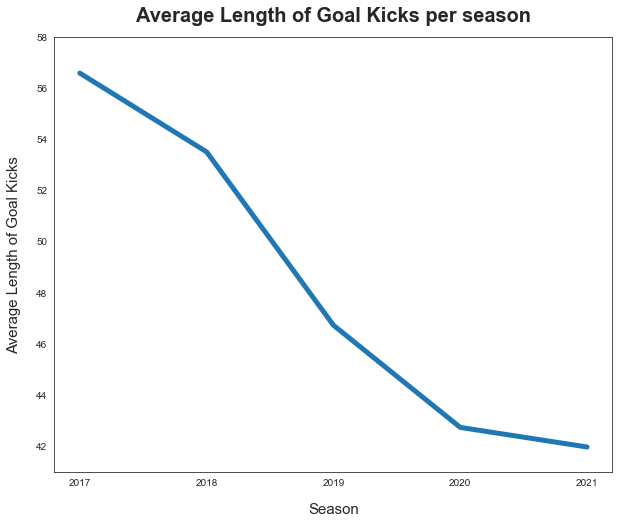

In [35]:
plt.figure(figsize = (10,8))
gk_plot_1 = sns.lineplot(data = goalkeeping_merged_data.query("season_name != '2022-2023'"), x = 'season', y = 'goal_kicks_avg_length', \
             ci = None, estimator = 'mean', linewidth = 5)
plt.title('Average Length of Goal Kicks per season', fontsize = 20, loc = 'center',fontweight = 'bold',pad = 15)
plt.xlabel("Season", fontsize = 15, labelpad = 15)
plt.ylabel("Average Length of Goal Kicks", fontsize = 15, labelpad = 15)
gk_plot_1.set_xticks([2017,2018,2019,2020,2021])
gk_plot_1.set(ylim = (41,58))
plt.show()

The average length of goal kicks has decreased substantially overall from 2017 to 2021, with a gradual decrease every year. Adding some context to this, in 2017, goal kicks went about 58 yards on average, which is close to half the length of the football pitch, meaning that goal kicks ended up around the midfield area (on average). By 2021, this length dropped to about 41 yards, meaning that the goal kicks remain inside the defensive third of the team (on average). 

This shows that the trend of goalkeepers just launching every ball forward to a tall forward is disappearing. Teams now focus on building attacks by keeping the ball on the ground, starting from the goalkeeper.   

Now, checking the average length of goal kicks, separated by Table Position Category for:
- Top 6 teams
- Mid Table teams: Placed 7 to 15
- Bottom 5 teams

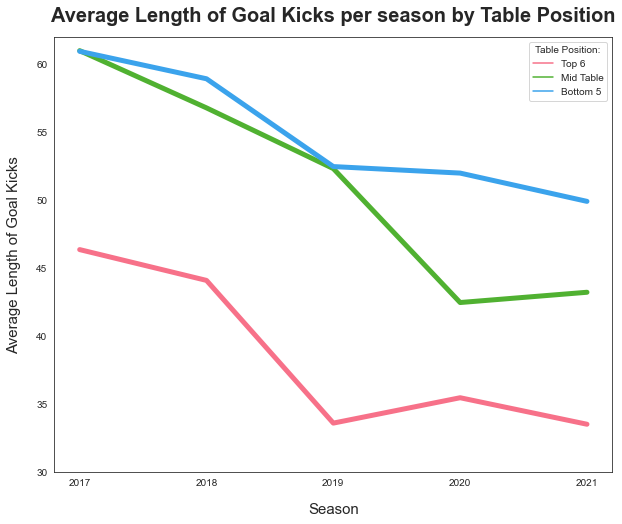

In [36]:
plt.figure(figsize = (10,8))
gk_plot_2 = sns.lineplot(data = goalkeeping_merged_data.query("season_name != '2022-2023'"), x = 'season', y = 'goal_kicks_avg_length',hue = 'table_position_category', \
             ci = None, estimator = 'mean', linewidth = 5, palette = palette_table_position)
plt.title('Average Length of Goal Kicks per season by Table Position', fontsize = 20, loc = 'center',fontweight = 'bold',pad = 15)
plt.xlabel("Season", fontsize = 15, labelpad = 15)
plt.ylabel("Average Length of Goal Kicks", fontsize = 15, labelpad = 15)
gk_plot_2.set_xticks([2017,2018,2019,2020,2021])
gk_plot_2.set(ylim = (30,62))
plt.legend(title = 'Table Position:')
plt.show()

Overall, the average pass lengths from goal kicks have decreased for all categories of teams. <br>
The top 6, expectedly, keep their goal kicks short by focusing on playing out from the back through their goalkeepers and defenders. The lengths of goal kicks by the Top 6 have gradually reduced from 2017 to 2021, with a slight increase in 2020.

The Mid Table and Bottom 5 teams have seen a substantial reduction in their length kicked from goal kicks. From 2017 till 2019 the Mid Table and Bottom 5 teams kicked their goal kicks about the same lengths. 

But in 2020 and 2021, the Mid table teams have separated themselves from the Bottom 5 teams in terms of length kicked from goal kicks. The exact lengths of goal kicks by the Mid Table and Bottom 5 teams are also influenced by the identity of the teams in Mid Table and Bottom 5 positions that season. However, the overall trend matters and that shows a decrease in the length of goal kicks.



### Question 2: Are Goalkeepers increasingly making shorter passes from <u> open play </u>? <br> </b>
When a possession runs into a cul-de-sac, teams often go back to their goalkeeper to safely restart the possession sequence. It is interesting to check what the goalkeeper does when the ball reaches them in such a situation, from open play.
    
Checking how average pass lengths have changed from Open Play:

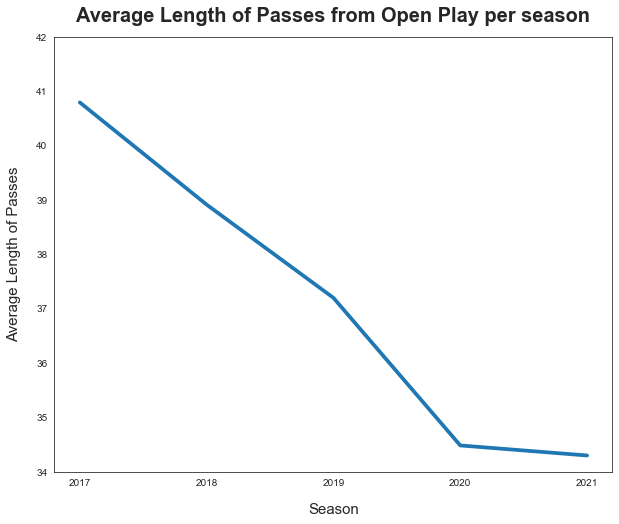

In [39]:
plt.figure(figsize = (10,8))
gk_plot_3 = sns.lineplot(data = goalkeeping_merged_data.query("season_name != '2022-2023'"), x = 'season', y = 'pass_avg_length',\
             ci = None, estimator = 'mean', linewidth = 3.75)
plt.title('Average Length of Passes from Open Play per season', fontsize = 20, loc = 'center',fontweight = 'bold',pad = 15)
plt.xlabel("Season", fontsize = 15, labelpad = 15)
plt.ylabel("Average Length of Passes", fontsize = 15, labelpad = 15)
gk_plot_3.set_xticks([2017,2018,2019,2020,2021])
gk_plot_3.set(ylim = (34,42))
plt.show()

The average length of passes from Open Play has reduced by about 7 yards when comparing the 2017 season to 2021.<br><br>
Now, separate the average length of open play passes by table position category.

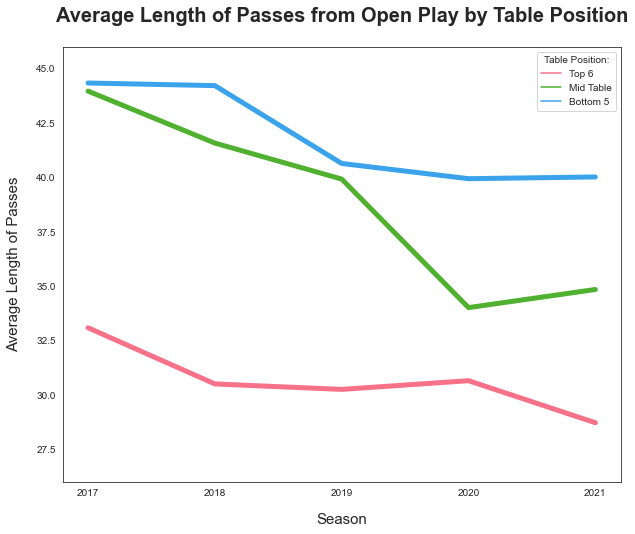

In [40]:
plt.figure(figsize = (10,8))
gk_plot_4 = sns.lineplot(data = goalkeeping_merged_data.query("season_name != '2022-2023'"), x = 'season', y = 'pass_avg_length', hue = 'table_position_category',\
             ci = None, estimator = 'mean', linewidth = 5, palette = palette_table_position)
plt.title('Average Length of Passes from Open Play by Table Position', fontsize = 20, loc = 'center',fontweight = 'bold',pad = 25)
plt.xlabel("Season", fontsize = 15, labelpad = 15)
plt.ylabel("Average Length of Passes", fontsize = 15, labelpad = 15)
gk_plot_4.set_xticks([2017,2018,2019,2020,2021])
gk_plot_4.set(ylim = (26,46))
plt.legend(title = 'Table Position:')
plt.show()

The length of passes from Open Play follows a similar pattern to that of the goal kicks seen in Question 1.
- Goalkeepers from Top 6 teams generally use shorter passes, to recycle possession when using the goalkeeper.
- Goalkeepers from Mid Table and Bottom 5 teams were not far off from each other till 2019 in their average length of goalkeeper passes. But they separate substantially in 2020 and 2021.

### Question 3: Are goalkeepers launching i.e kicking long a large perentage of their passes from Goal kicks and Open play? Has this percentage reduced or increased across seasons?

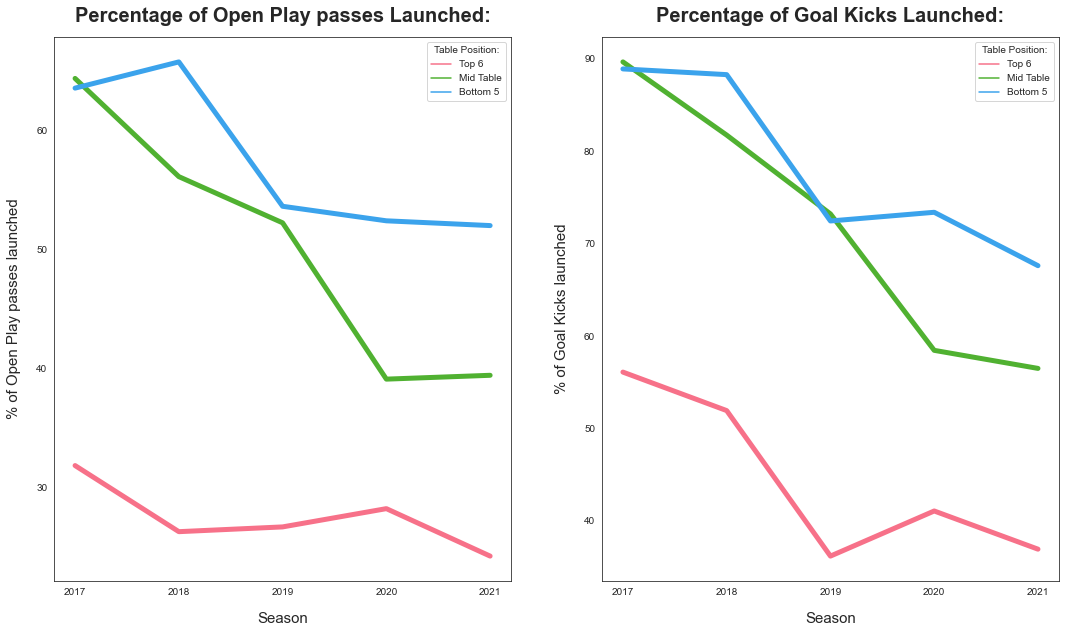

In [41]:
f, ax = plt.subplots(1,2, figsize = (18,10), sharey = False)
gk_plot_5 = sns.lineplot(data = goalkeeping_merged_data.query("season_name != '2022-2023'"), x = 'season', y = 'passes_launched_percent', hue = 'table_position_category', ci = None, ax = ax[0],linewidth = 5, palette = palette_table_position, estimator = 'mean')
gk_plot_6 = sns.lineplot(data = goalkeeping_merged_data.query("season_name != '2022-2023'"), x = 'season', y = 'goal_kicks_launched_percent', hue = 'table_position_category', ci = None, ax = ax[1],linewidth = 5, palette = palette_table_position, estimator = 'mean')
gk_plot_5.set(xticks = [2017, 2018, 2019, 2020, 2021])
gk_plot_5.set_title('Percentage of Open Play passes Launched:',fontsize = 20, loc = 'center',fontweight = 'bold',pad = 15)
gk_plot_5.set_xlabel('Season', fontsize = 15, labelpad = 15)
gk_plot_5.set_ylabel('% of Open Play passes launched', fontsize = 15, labelpad = 15)
gk_plot_5.legend(title = 'Table Position:')
gk_plot_6.set(xticks = [2017, 2018, 2019, 2020, 2021])
gk_plot_6.set_title('Percentage of Goal Kicks Launched:',fontsize = 20, loc = 'center',fontweight = 'bold',pad = 15)
gk_plot_6.set_xlabel('Season', fontsize = 15, labelpad = 15)
gk_plot_6.set_ylabel('% of Goal Kicks launched', fontsize = 15, labelpad = 15)
gk_plot_6.legend(title = 'Table Position:')
plt.show()

Analysing the two graphs: <br>
i. <b> The plot for % of Open Play passes launched per season shows that:</b>
- Mid Table teams show a  substantial decrease in their % of passes launched from open play. Goalkeepers from these teams were launching more than 60% of their open play passes in 2017, by 2021 this percentage fell to about 40%.
- The Bottom 5 teams have shown about a 10 percent decrease in the amount of passes their goalkeepers launch.  These are teams that are getting dreadful results in the season which is the reason they are in the Bottom 5, and these teams rarely have goalkeepers who can calmly pass the ball under pressure from opponents. So there is some logic to explain these teams choosing to still launch a good percentage of their goalkeeper's passes. 
- Top 6 teams were launching a low % of their passes even in 2017, at about 33%. And this has seen a minor decrease as the seasons have progressed, with a slight increase in 2020. 

ii. <b> The plot for % of Goal Kicks launched per season: </b>
- The Mid Table and Bottom 5 teams were launching i.e kicking long, a whopping 90% of their goal kicks in the 2017 season. As seasons have progressed, this % has decreased substantially for both sets of teams. The Mid Table teams long kick only about 60% of their goal kicks by the 2021 season. Whereas the Bottom 5 teams kick about 75% of their goal kicks long.

- Surprisingly, Top 6 teams were launching more than 50% of their goal kicks in the 2017 season. But this fell to about 40 percent by the 2021 season.

### Question 4: Is there a relationship between goalkeepers passes short and the team keeping more possession?
First, merging the possession stats for each team across a season, which is present in the possession_data table, into the goalkeeping data frame.
Then, make a new data frame using the query method, by excluding the ongoing 2022-2023 season data.

In [43]:
goalkeeping_merged_data = pd.merge(goalkeeping_merged_data, possession_data.loc[:, ['season_name', 'squad', 'possession']], on = ['squad', 'season_name'])
goalkeeping_merged_data_past_5 = goalkeeping_merged_data.query("season_name != '2022-2023'")

NameError: name 'possession_data' is not defined